In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/data2.csv', index_col='Date')
df.drop(columns='Unnamed: 0',inplace=True)

In [3]:
df

,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,...,Semana,Año,Estacion,Precio_Maximo,Precio_Minimo,STD_diaria,Media_Precio_Maximo_mes,Media_Precio_Minimo_mes,Media_STD_diaria_mes,Fin_de_semana
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-31,18.21,5.00,4.00,0.31,0.00,0.00,0.01,4.00,4.30,10.47,...,6.0,2023.0,4,101.30,0.00,34.817724,105.400000,47.593871,17.839671,1
2023-12-30,86.31,82.33,78.77,70.00,62.06,59.01,76.02,79.39,86.31,88.21,...,5.0,2023.0,4,88.21,42.04,15.102659,105.400000,47.593871,17.839671,1
2023-12-29,102.07,95.15,94.37,93.90,87.38,87.00,93.00,105.19,109.62,107.79,...,4.0,2023.0,4,126.72,87.00,11.380940,105.400000,47.593871,17.839671,0
2023-12-28,95.62,87.99,78.56,76.20,75.18,76.46,90.78,101.11,108.37,108.45,...,3.0,2023.0,4,128.46,75.18,15.580826,105.400000,47.593871,17.839671,0
2023-12-27,78.00,75.00,58.59,54.10,50.18,53.40,65.10,80.20,91.75,87.00,...,2.0,2023.0,4,121.53,50.18,21.143356,105.400000,47.593871,17.839671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-01-05,37.02,13.52,13.29,13.29,13.29,13.16,13.28,13.29,18.96,19.71,...,0.0,1998.0,4,38.77,13.16,10.268291,35.887097,17.280645,6.290465,0
1998-01-04,35.58,20.00,13.46,13.34,13.28,13.28,13.28,13.28,13.16,12.84,...,6.0,1998.0,4,40.75,12.84,10.984821,35.887097,17.280645,6.290465,1
1998-01-03,25.33,18.93,18.33,18.33,17.71,17.43,17.43,13.52,17.43,18.78,...,5.0,1998.0,4,25.33,13.52,2.713175,35.887097,17.280645,6.290465,1


In [4]:
df = df[::-1]

In [5]:
# df = df[0:7305]

In [6]:
df_train = df[0:7305]['Media_del_dia']

In [7]:
df_test = df[7305::]['Media_del_dia']

In [8]:
df_train

Date
1998-01-01    19.076667
1998-01-02    22.440000
1998-01-03    19.594167
1998-01-04    23.191250
1998-01-05    25.960833
                ...    
2017-12-27    40.691250
2017-12-28    47.070000
2017-12-29    46.819583
2017-12-30    35.291667
2017-12-31    16.151667
Name: Media_del_dia, Length: 7305, dtype: float64

In [9]:
df_test

Date
2018-01-01      7.639167
2018-01-02     37.690000
2018-01-03     37.947917
2018-01-04     36.551667
2018-01-05     42.204583
                 ...    
2023-12-27     79.545000
2023-12-28     98.193333
2023-12-29    103.500417
2023-12-30     68.405417
2023-12-31     30.056250
Name: Media_del_dia, Length: 2191, dtype: float64

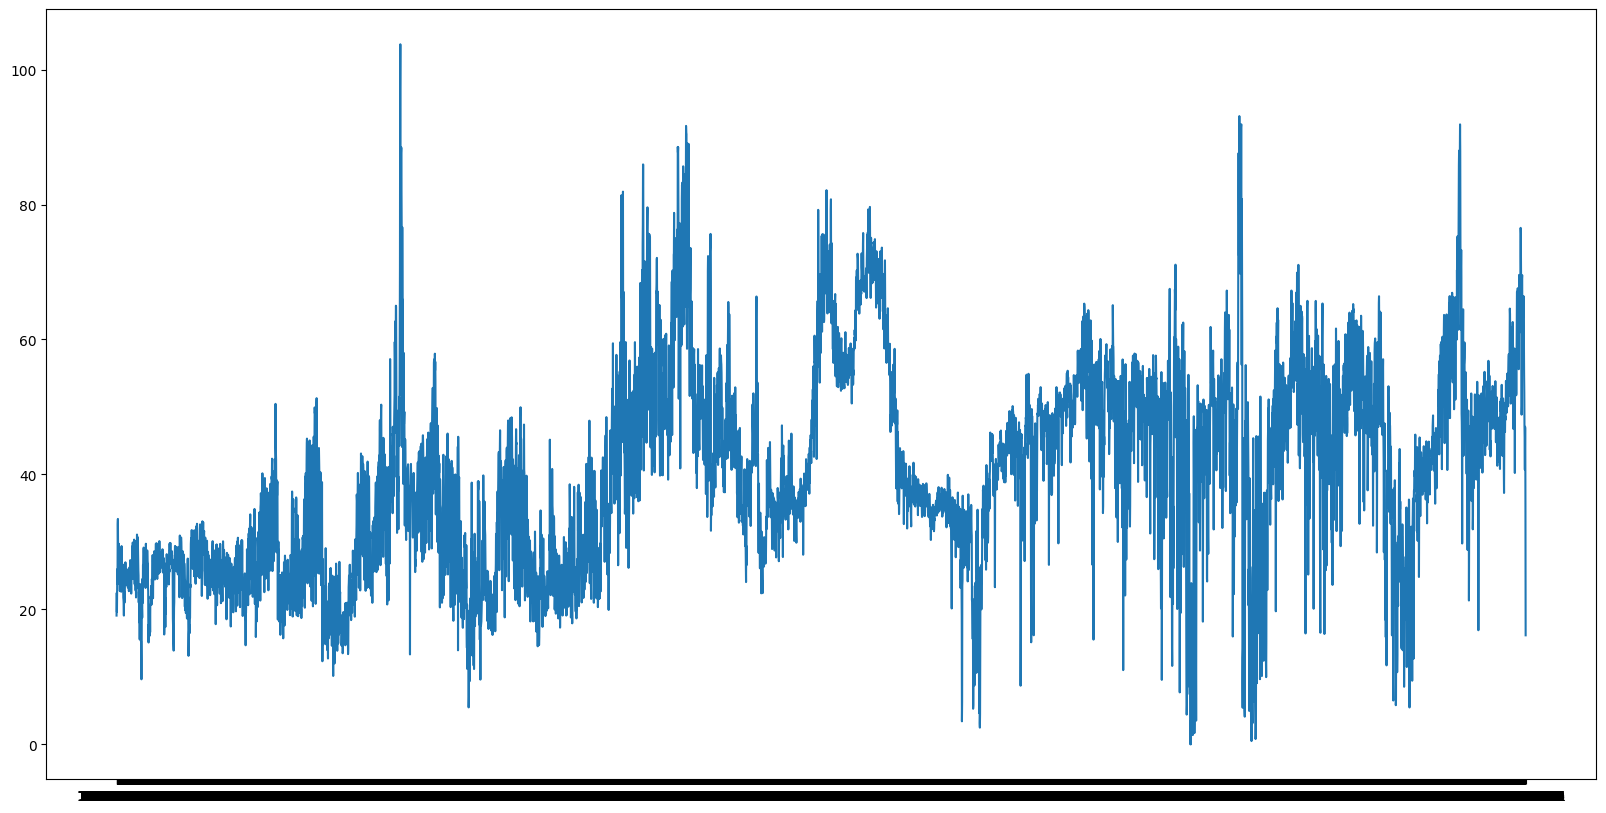

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df_train);

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
df_train.index = pd.to_datetime(df_train.index)

In [13]:
df_test.index = pd.to_datetime(df_test.index)

In [14]:
result_add = seasonal_decompose(df_train, model='additive')

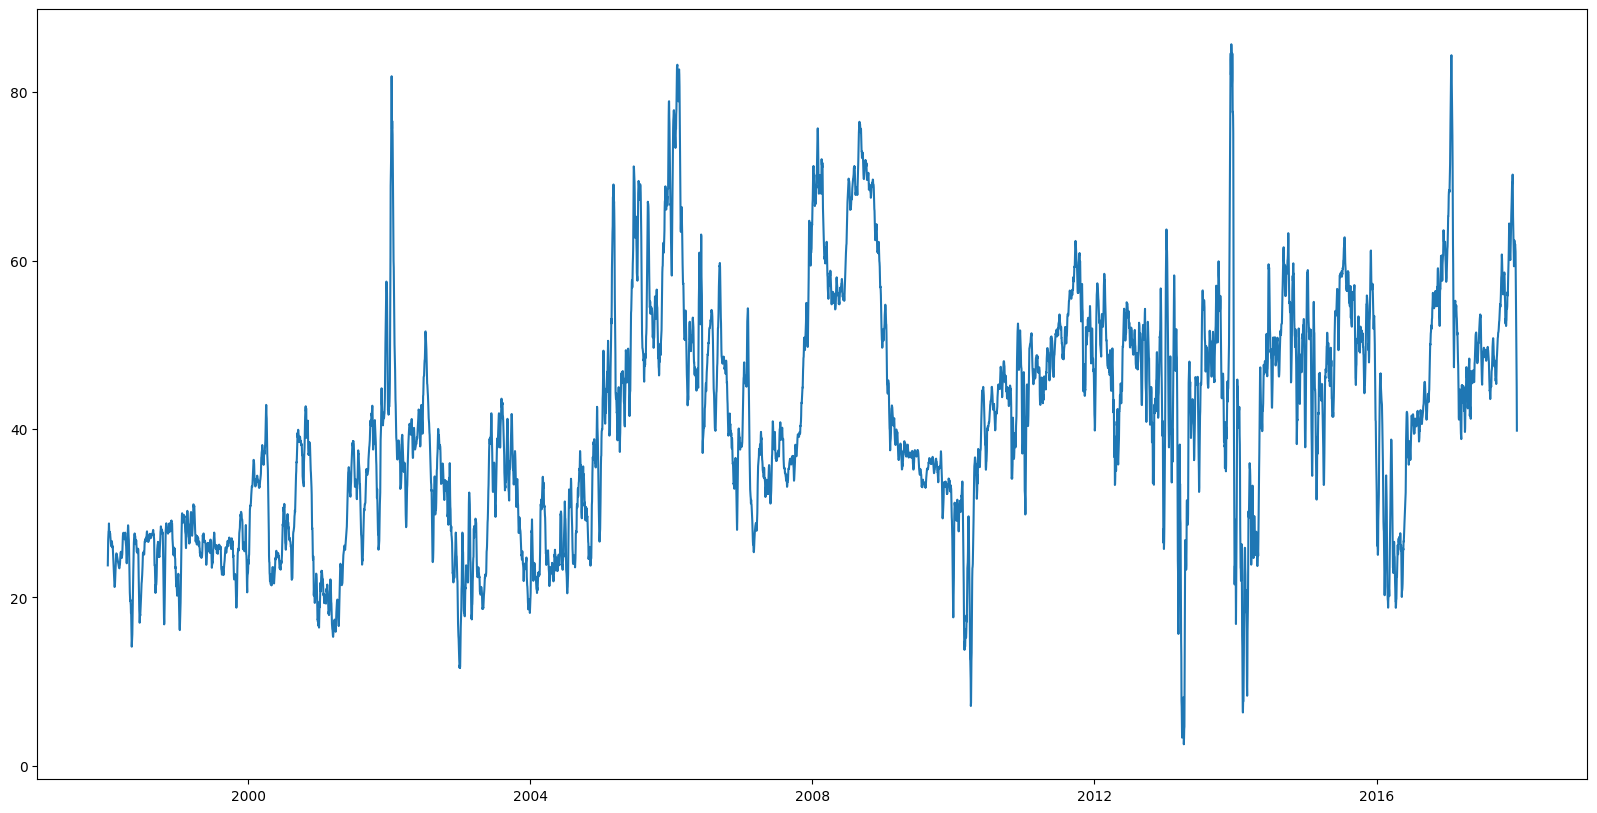

In [15]:
plt.figure(figsize=(20,10))
plt.plot(result_add.trend);

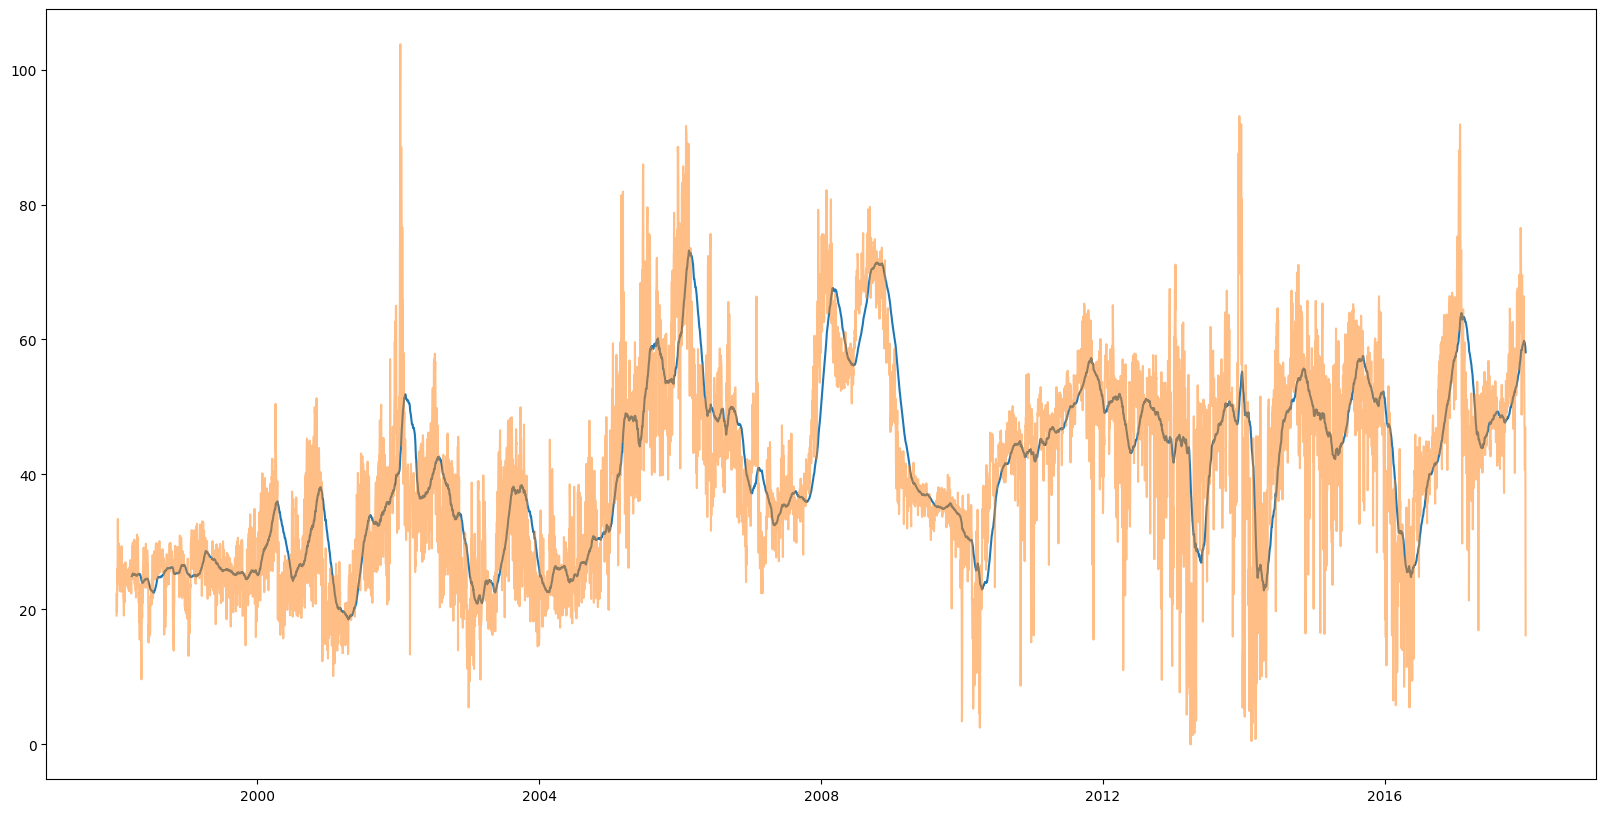

In [16]:
df_ma = df_train.rolling(80).mean()
df_ma
plt.figure(figsize=(20,10))
plt.plot(df_ma)
plt.plot(df_train, alpha=0.5);

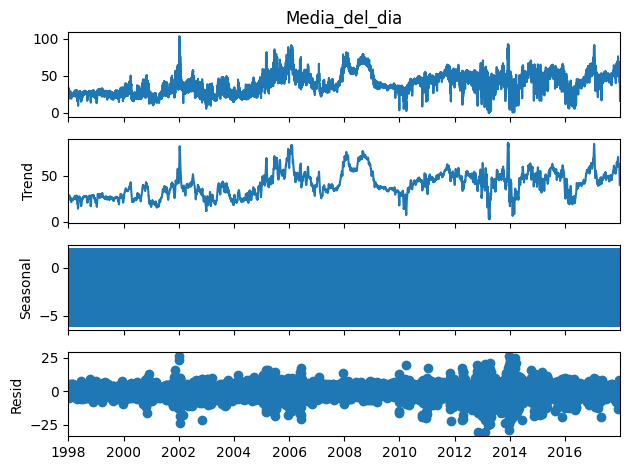

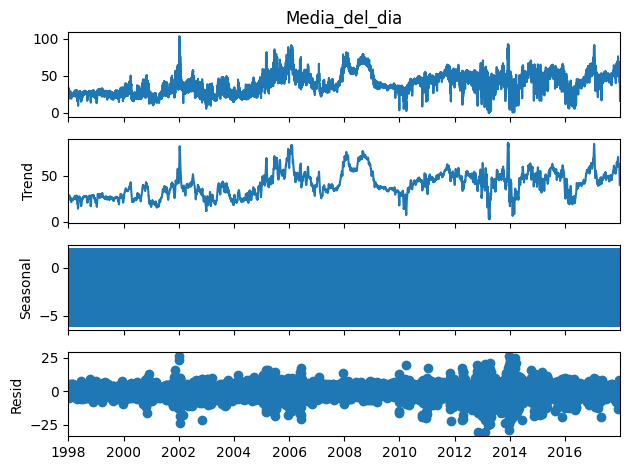

In [17]:
result_add.plot()

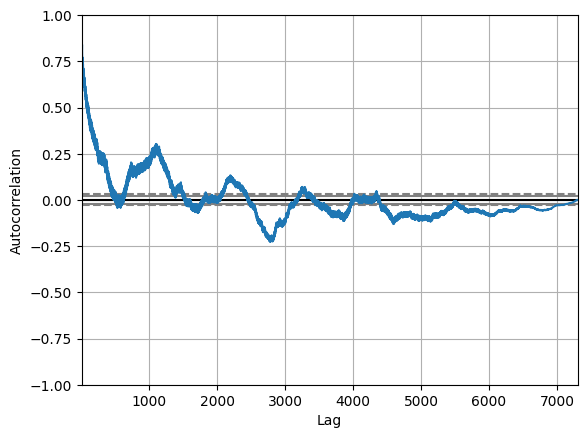

In [18]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_train);

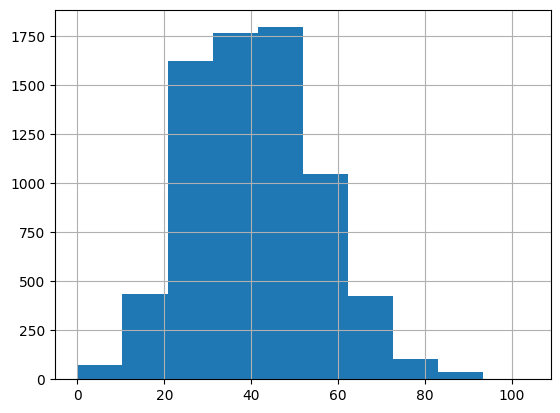

In [19]:
df_train.hist();

In [20]:
X = df_train
X

Date
1998-01-01    19.076667
1998-01-02    22.440000
1998-01-03    19.594167
1998-01-04    23.191250
1998-01-05    25.960833
                ...    
2017-12-27    40.691250
2017-12-28    47.070000
2017-12-29    46.819583
2017-12-30    35.291667
2017-12-31    16.151667
Name: Media_del_dia, Length: 7305, dtype: float64

In [21]:
train = X

In [22]:
from pmdarima.arima import auto_arima, ARIMA

In [ ]:
model = auto_arima(train,
                   start_p=1,
                   start_q=1,
                   max_p=5,
                   max_q=5,
                   max_d=3,
                   trace=True,
                   m=12,
                   stationary=False,
                   n_jobs=-1,
                   d=1)

In [ ]:
y_pred = model.predict(2191)
y_pred

2018-01-01    28.497038
2018-01-02    33.693617
2018-01-03    33.549374
2018-01-04    32.397105
2018-01-05    31.951559
                ...    
2023-12-27    31.189770
2023-12-28    31.192687
2023-12-29    31.188310
2023-12-30    31.180216
2023-12-31    31.174834
Freq: D, Length: 2191, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(df_test, y_pred)

55.337960184923936

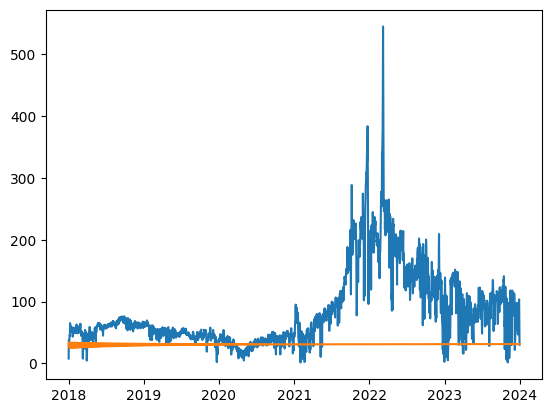

In [ ]:
plt.plot(df_test)
plt.plot(y_pred);